# FOREST FIRES DATASET
Using the above dataset to build a SVM model to predict the size of forest fires 

## BUSINESS OBJECTIVE
* Minimize loses
* Maximize rescue effectiveness
* Maximize accurate prediction

## CONSTRAINTS
* Negligence
* Extreme Heat

## DATA DICTIONARY

| **slno** |      **Name of Feature**     | **Description**                                                          | **Type** | **Relevance** |
|:--------:|:----------------------------|:--------------------------------------------------------------------------|:--------:|:-------------:|
| 1 | month | month of the year: 'jan' to 'dec'| Nominal    | Relevant      |
| 2 | day   | day of the week: 'mon' to 'sun'   | Nominal    | Relevant      |
| 3 | FFMC        | FFMC index from the FWI system: 18.7 to 96.20 | Ratio  | Relevant   |
| 4 | DMC    | DMC index from the FWI system: 1.1 to 291.3| Ratio    | Relevant      |
| 5 | DC | DC index from the FWI system: 7.9 to 860.6 | Ratio    | Relevant      |
| 6 | ISI  | ISI index from the FWI system: 0.0 to 56.10| Ratio   | Relevant      |
| 7 | temp | temperature in Celsius degrees: 2.2 to 33.30| Ratio| Relevant      |
| 8 | RH | relative humidity in %: 15.0 to 100| Ratio | Relevant      |
| 9 | wind | wind speed in km/h: 0.40 to 9.40| Ratio | Relevant      |
| 10 | rain    | outside rain in mm/m2 : 0.0 to 6.4| Ratio | Relevant      |
| 11 | area | the burned area of the forest (in ha): 0.00 to 1090.84| Ratio| Relevant      |


The remaining columns are just one hot encoded variables of the month and day columns.  

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from sklearn.model_selection import train_test_split

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass26\forestfires.csv")
df=df0.copy()
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(517, 31)

In [4]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  8


Dropping the duplicate rows,

In [8]:
df.drop_duplicates(keep='first',inplace=True)
df.reset_index(inplace=True,drop=True)
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


Checking the Number and Percentage of Missing Values in the Dataset.

In [9]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 month            0
daytue           0
monthsep         0
monthoct         0
monthnov         0
monthmay         0
monthmar         0
monthjun         0
monthjul         0
monthjan         0
monthfeb         0
monthdec         0
monthaug         0
monthapr         0
daywed           0
daythu           0
day              0
daysun           0
daysat           0
daymon           0
dayfri           0
area             0
rain             0
wind             0
RH               0
temp             0
ISI              0
DC               0
DMC              0
FFMC             0
size_category    0
dtype: int64


Checking the number of uniques in each variable.

In [10]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64


Saving the columns which are going to be dropped in another dataframe along with the output column to create plots.

In [11]:
df1=df[['month','day','size_category']].copy()
df1.head()

,month,day,size_category
0,mar,fri,small
1,oct,tue,small
2,oct,sat,small
3,mar,fri,small
4,mar,sun,small


Dropping the month and day columns as they are already one hot encoded in the dataset. 

In [12]:
df.drop(['month','day'],axis=1,inplace=True)
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [13]:
df.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep',
       'size_category'],
      dtype='object')

In [14]:
df=df.loc[:,['size_category','FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed',
       'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul',
       'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']]
df.head()

,size_category,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,small,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0
1,small,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,small,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
3,small,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,...,0,0,0,0,0,1,0,0,0,0
4,small,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,...,0,0,0,0,0,1,0,0,0,0


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [15]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_9696\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


FFMC         90.618075
DMC         110.235756
DC          547.787623
ISI           9.023576
temp         18.865422
RH           44.253438
wind          4.011395
rain          0.020432
area         12.992908
dayfri        0.163065
daymon        0.145383
daysat        0.161100
daysun        0.184676
daythu        0.117878
daytue        0.123772
daywed        0.104126
monthapr      0.017682
monthaug      0.349705
monthdec      0.017682
monthfeb      0.039293
monthjan      0.003929
monthjul      0.062868
monthjun      0.031434
monthmar      0.104126
monthmay      0.003929
monthnov      0.001965
monthoct      0.029470
monthsep      0.337917
dtype: float64

In [16]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_9696\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


FFMC         91.60
DMC         108.30
DC          664.20
ISI           8.40
temp         19.30
RH           42.00
wind          4.00
rain          0.00
area          0.61
dayfri        0.00
daymon        0.00
daysat        0.00
daysun        0.00
daythu        0.00
daytue        0.00
daywed        0.00
monthapr      0.00
monthaug      0.00
monthdec      0.00
monthfeb      0.00
monthjan      0.00
monthjul      0.00
monthjun      0.00
monthmar      0.00
monthmay      0.00
monthnov      0.00
monthoct      0.00
monthsep      0.00
dtype: float64

In [17]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_9696\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)
C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\lenny\AppData\Local\Temp\ipykernel_9696\4235401754.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/ref

ModeResult(mode=array([['small', 92.1, 99.0, 745.3, 9.6, 19.6, 27, 3.1, 0.0, 0.0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=object), count=array([[371,  27,  10,  10,  22,   8,  32,  53, 502, 240, 426, 435, 427,
        415, 449, 446, 456, 500, 331, 500, 489, 507, 477, 493, 456, 507,
        508, 494, 337]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [18]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_9696\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


FFMC           30.863885
DMC          4070.964703
DC          61601.364433
ISI            21.022986
temp           34.118251
RH            267.819501
wind            3.243334
rain            0.087771
area         4113.087439
dayfri          0.136743
daymon          0.124491
daysat          0.135413
daysun          0.150867
daythu          0.104188
daytue          0.108666
daywed          0.093467
monthapr        0.017403
monthaug        0.227859
monthdec        0.017403
monthfeb        0.037823
monthjan        0.003922
monthjul        0.059032
monthjun        0.030506
monthmar        0.093467
monthmay        0.003922
monthnov        0.001965
monthoct        0.028657
monthsep        0.224170
dtype: float64

In [19]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_9696\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


FFMC          5.555527
DMC          63.804112
DC          248.196222
ISI           4.585083
temp          5.841083
RH           16.365192
wind          1.800926
rain          0.296261
area         64.133357
dayfri        0.369788
daymon        0.352833
daysat        0.367985
daysun        0.388416
daythu        0.322781
daytue        0.329645
daywed        0.305724
monthapr      0.131921
monthaug      0.477346
monthdec      0.131921
monthfeb      0.194482
monthjan      0.062622
monthjul      0.242965
monthjun      0.174660
monthmar      0.305724
monthmay      0.062622
monthnov      0.044324
monthoct      0.169285
monthsep      0.473466
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [20]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_9696\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


FFMC        -6.540474
DMC          0.558596
DC          -1.100245
ISI          2.529891
temp        -0.321869
RH           0.869644
wind         0.581689
rain        20.044822
area        12.753940
dayfri       1.829503
daymon       2.018039
daysat       1.849188
daysun       1.630046
daythu       2.377024
daytue       2.291627
daywed       2.599965
monthapr     7.341047
monthaug     0.632194
monthdec     7.341047
monthfeb     4.756486
monthjan    15.905788
monthjul     3.612506
monthjun     5.386637
monthmar     2.599965
monthmay    15.905788
monthnov    22.561028
monthoct     5.580964
monthsep     0.687365
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [21]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_9696\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


FFMC         66.255682
DMC           0.251618
DC           -0.242656
ISI          21.288771
temp          0.101560
RH            0.447242
wind          0.043986
rain        426.542289
area        191.265722
dayfri        1.352379
daymon        2.080640
daysat        1.425080
daysun        0.659626
daythu        3.664628
daytue        3.264364
daywed        4.778578
monthapr     52.095660
monthaug     -1.606660
monthdec     52.095660
monthfeb     20.705500
monthjan    251.984198
monthjul     11.093778
monthjun     27.122416
monthmar      4.778578
monthmay    251.984198
monthnov    509.000000
monthoct     29.262120
monthsep     -1.533570
dtype: float64

### GRAPHICAL REPRESENTATION

Using the countplots and distribution plots to understand the different variables.

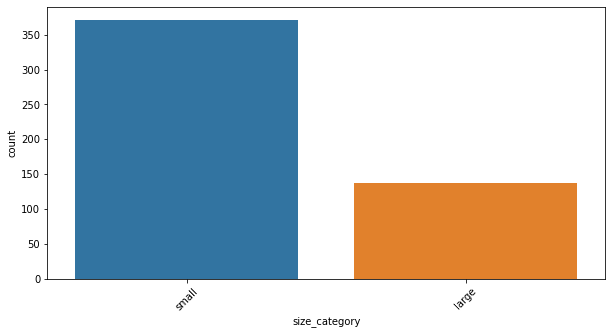

In [22]:
plt.figure(1, figsize=(10, 5))
sns.countplot(x=df1["size_category"])
plt.xticks(rotation = 45)
plt.show()

So from the above we can understand that small forest fires are more common than large ones.

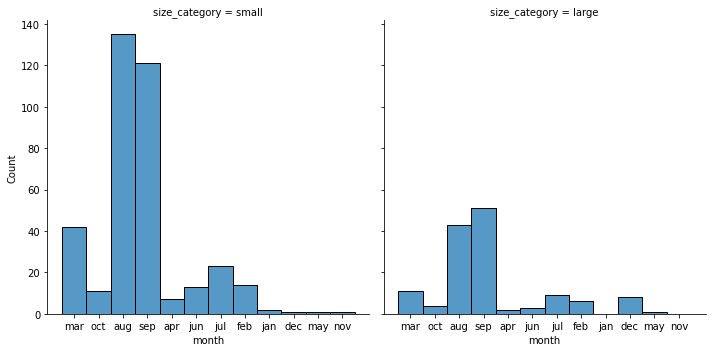

In [23]:
sns.displot(df1, x="month", col="size_category")

From the above we can see that in the month of december there are more large forest fires than small forest fires and the forest fires are lowest in the months of january, may and november. 

Plotting the histograms of the numeric variables. 

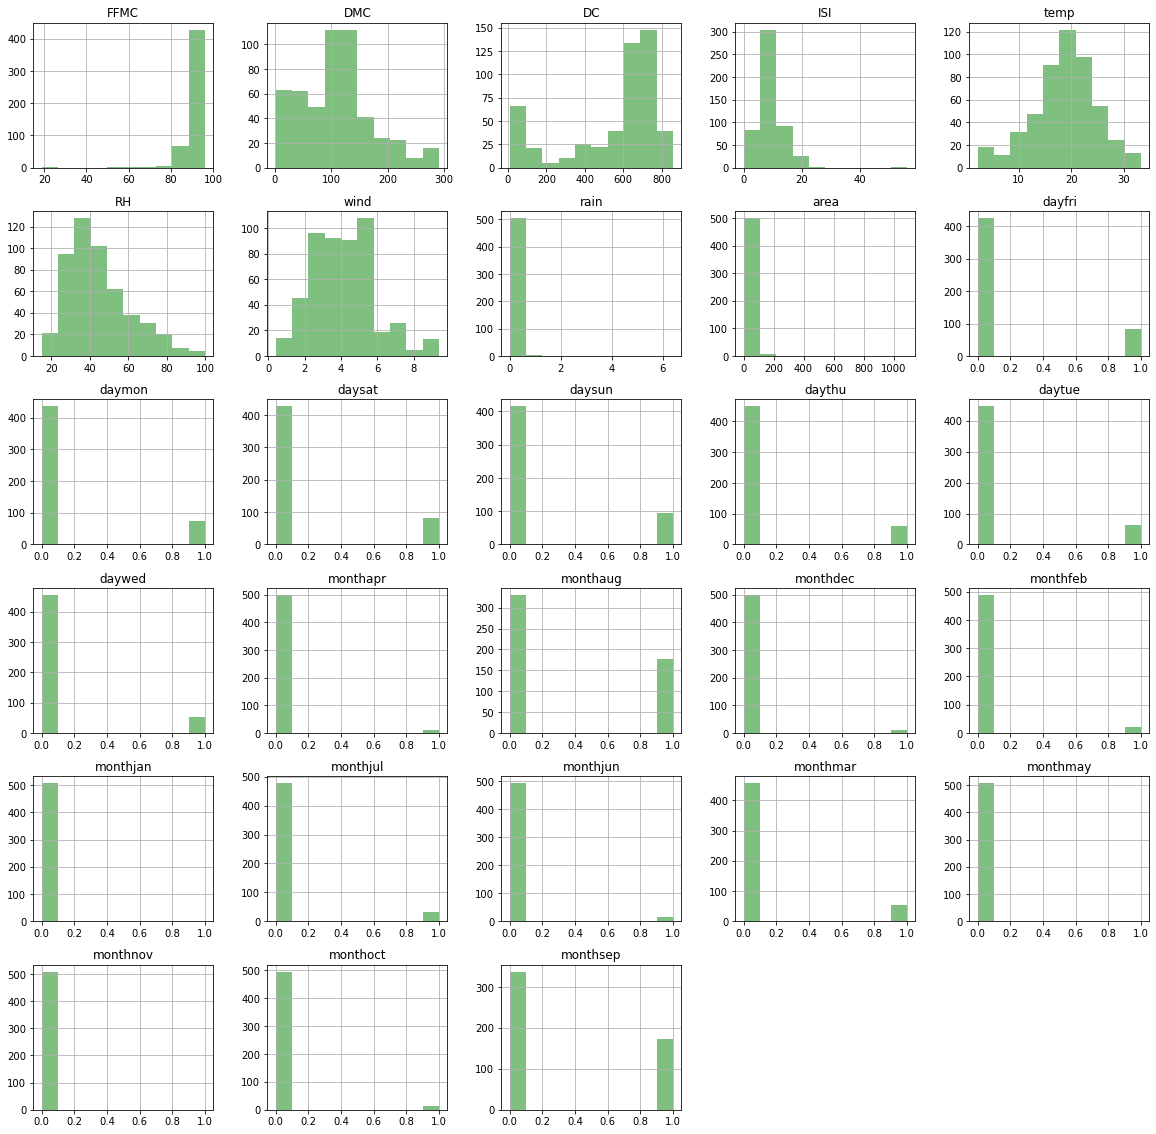

In [24]:
df.hist(alpha=0.5, figsize=(20, 20), color='green')
plt.show()

Plotting the pairplots of some variables as while trying for all the variables it was not loading and crashing. 

<Figure size 432x288 with 0 Axes>

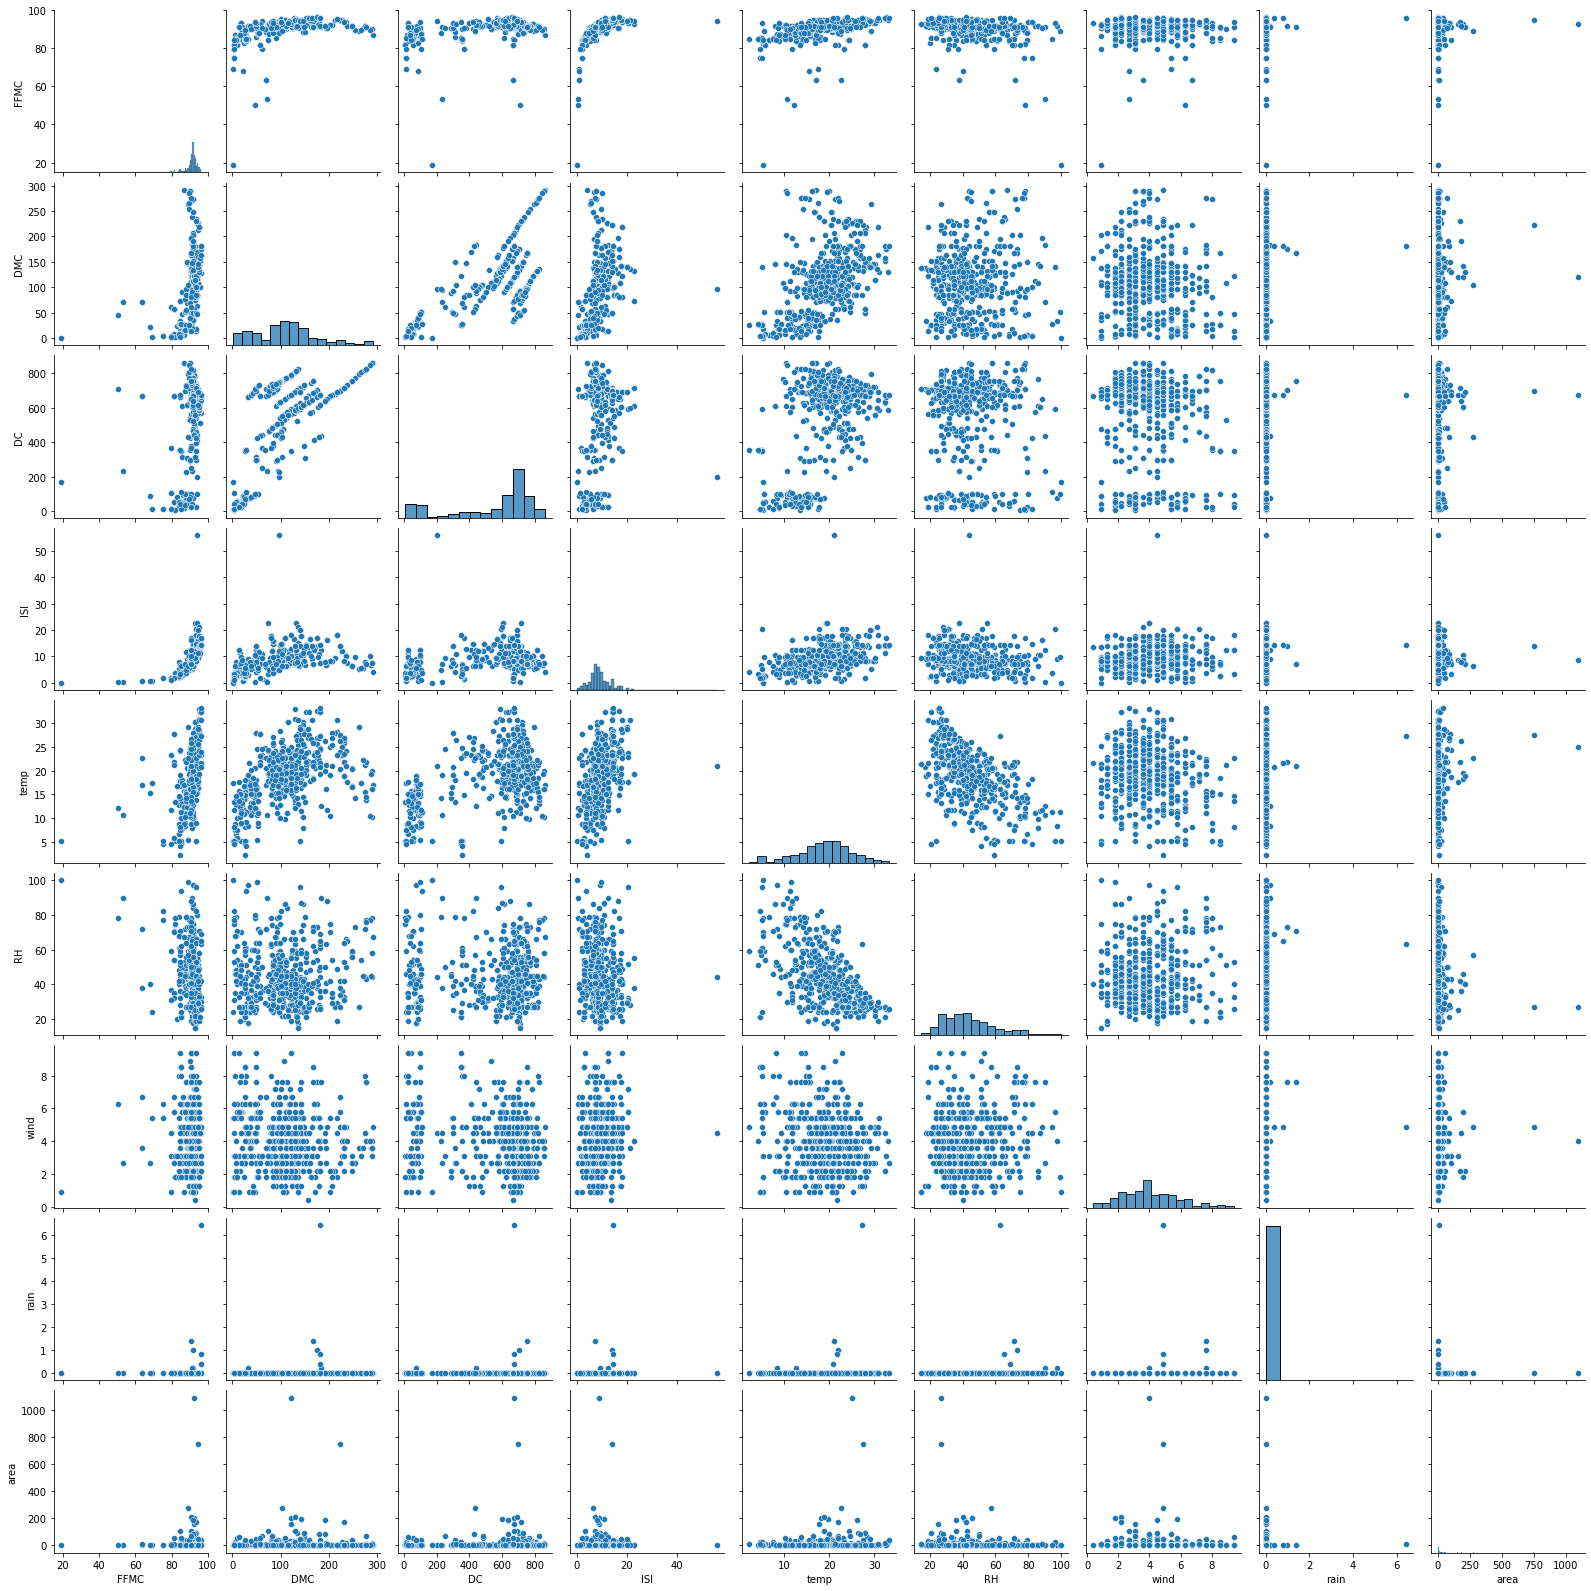

In [25]:
plt.figure()
sns.pairplot(df, vars=['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area'])
plt.show()

Plotting the boxplots of each variable.

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FFMC'>

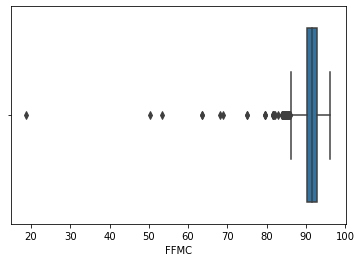

In [26]:
sns.boxplot(df["FFMC"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DMC'>

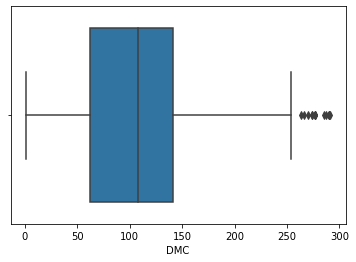

In [27]:
sns.boxplot(df["DMC"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='DC'>

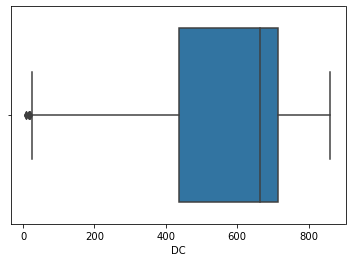

In [28]:
sns.boxplot(df["DC"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ISI'>

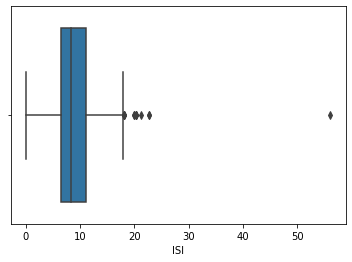

In [29]:
sns.boxplot(df["ISI"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp'>

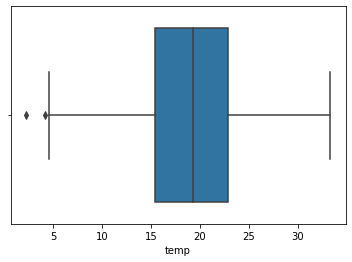

In [30]:
sns.boxplot(df["temp"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RH'>

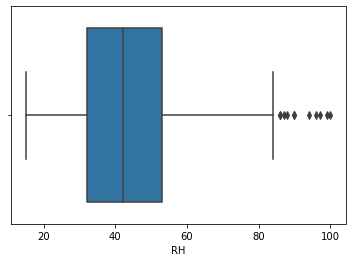

In [31]:
sns.boxplot(df["RH"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wind'>

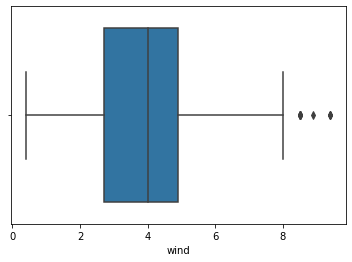

In [32]:
sns.boxplot(df["wind"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

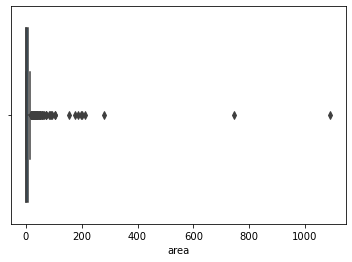

In [33]:
sns.boxplot(df["area"])

from the boxplots it is clear that there are outliers in the above variables so checking the number of outliers in each variable using the below custom function.

In [34]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [35]:
sum(outlier_func(df["FFMC"]))

53

In [36]:
sum(outlier_func(df["DMC"]))

16

In [37]:
sum(outlier_func(df["DC"]))

8

In [38]:
sum(outlier_func(df["ISI"]))

14

In [39]:
sum(outlier_func(df["temp"]))

2

In [40]:
sum(outlier_func(df["RH"]))

11

In [41]:
sum(outlier_func(df["wind"]))

13

In [42]:
sum(outlier_func(df["area"]))

62

Using winsorization to rectify the outliers to avoid data lose.The module used for Winsorization is feature_engine

In [43]:
from feature_engine.outliers import Winsorizer

In [44]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['FFMC'])

df['FFMC']= winsor.fit_transform(df[['FFMC']])
sum(outlier_func(df['FFMC']))

0

In [45]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['DMC'])

df['DMC']= winsor.fit_transform(df[['DMC']])
sum(outlier_func(df['DMC']))

0

In [46]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['DC'])

df['DC']= winsor.fit_transform(df[['DC']])
sum(outlier_func(df['DC']))

0

In [47]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['ISI'])

df['ISI']= winsor.fit_transform(df[['ISI']])
sum(outlier_func(df['ISI']))

0

In [48]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['temp'])

df['temp']= winsor.fit_transform(df[['temp']])
sum(outlier_func(df['temp']))

0

In [49]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['RH'])

df['RH']= winsor.fit_transform(df[['RH']])
sum(outlier_func(df['RH']))

0

In [50]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['wind'])

df['wind']= winsor.fit_transform(df[['wind']])
sum(outlier_func(df['wind']))

0

In [51]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['area'])

df['area']= winsor.fit_transform(df[['area']])
sum(outlier_func(df['area']))

0

__CORRELATION CHART__

<AxesSubplot:>

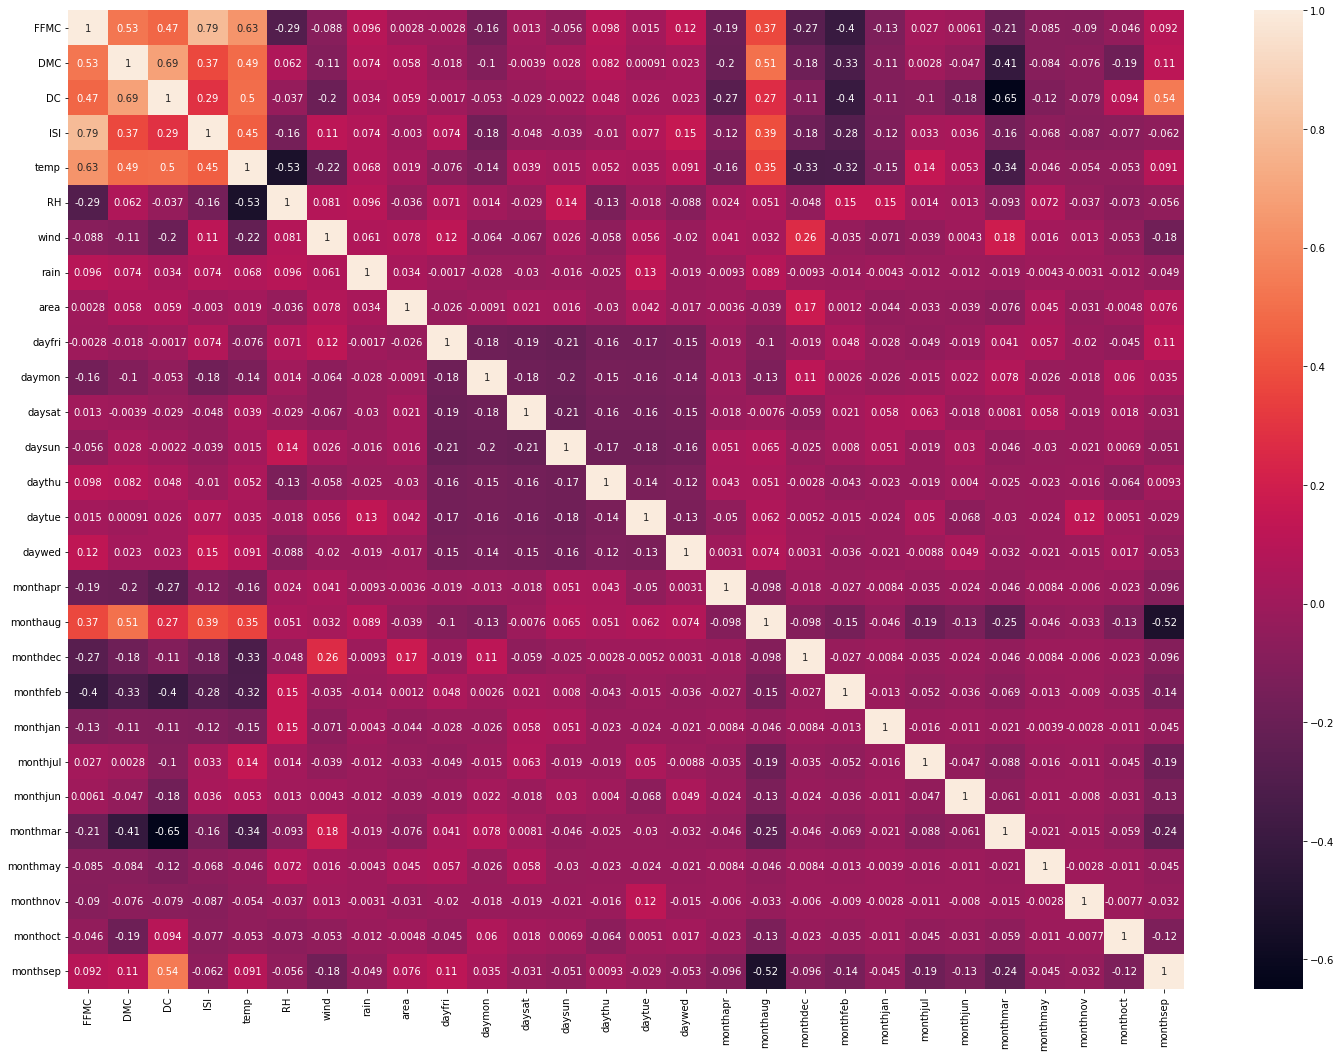

In [52]:
plt.figure(figsize=(25,18))
sns.heatmap(df.corr(),annot=True)

from the correlation chart it is clear that no variable has a very strong relation with the output variable

__TRAIN TEST SPLIT__

Using the train test split function to split the data into train and test dataset. 

In [53]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]

In [54]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3,random_state=497,stratify=Y) 

#### MODEL BUILDING

Importing the library required for building the model. 

In [55]:
from sklearn.svm import SVC

Fitting the model on the training data. 

In [56]:
model=SVC(kernel='linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

Loading the libraries required for getting the accuracy scores of the model.

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

__TEST DATASET__

Predicting the test dataset using the model.

In [58]:
test_predict = model.predict(X_test) 

__Accuracy Score__

In [59]:
accuracy_score(Y_test, test_predict)

0.9869281045751634

__Confusion Matrix__

In [60]:
pd.crosstab(test_predict,Y_test,rownames = ['Predictions'], colnames= ['Actuals'])

Actuals,large,small
Predictions,,
large,39,0
small,2,112


__Classification Report__

In [61]:
print(classification_report(y_pred=test_predict, y_true=Y_test))

              precision    recall  f1-score   support

       large       1.00      0.95      0.97        41
       small       0.98      1.00      0.99       112

    accuracy                           0.99       153
   macro avg       0.99      0.98      0.98       153
weighted avg       0.99      0.99      0.99       153



__TRAIN DATASET__

Predicting the output on the train dataset using the model.

In [62]:
train_predict = model.predict(X_train) 

__Accuracy Score__

In [63]:
accuracy_score(Y_train, train_predict) 

1.0

__Confusion Matrix__

In [64]:
pd.crosstab(train_predict,Y_train,rownames = ['Predictions'], colnames= ['Actuals'])

Actuals,large,small
Predictions,,
large,97,0
small,0,259


__Classification Report__

In [65]:
print(classification_report(y_pred=train_predict, y_true=Y_train))

              precision    recall  f1-score   support

       large       1.00      1.00      1.00        97
       small       1.00      1.00      1.00       259

    accuracy                           1.00       356
   macro avg       1.00      1.00      1.00       356
weighted avg       1.00      1.00      1.00       356



### CONCLUSION

From the accuracies of both the train and test data we can see that the accuracy is good and they also have proper fit. So this is a good model for predicting this dataset. 

This model is ideal to predict the number of forest fires for every month thus helping to take precautionary measures and being more prepared. 